In [1]:
#!pip install plotly scikit-image
#!pip install chart_studio

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly
from skimage import measure

In [4]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


# La Particla en la Caja


En el laboratrio de hoy, vamos a investigar las funciones de ondas de particulas 
en distintas cajas. Para ello usaremos el idioma de programación Python, que 
nos permite tanto hacer operaciones numéricas como tambíen gráficar funciones. 
Las posibles funciones de estado de una particula en la caja 1D se obtienen al 
resolver la ecuación de Schrördinger:

$$
\begin{align}
\hat{H}\Psi(x) = E\Psi(x)\\
-\frac{\hbar²}{2m}\frac{d^2}{dx^2}\Psi(x) = E\Psi(X)
\end{align}
$$

Esta es una ecuación diferencial de segundo orden, para la cual es posible encontrar 
soluciones exactas, para una partícula en una caja de largo $L$ y masa $m$.


$$
\begin{align}
\Psi(x) = \sqrt{\frac{2}{L}}\sin{\frac{n\pi x}{L}} \qquad E_n = \frac{n^2h}{8mL^2}
\end{align}
$$

Dentro de la caja, es decir entre x=0 y x=L, esta es la función de onda de la partícula en un estado *n*.
Este número entero que define el estado de la particula. Nótese que a medida que  $n$ aumenta, la partícula 
tiene más energía cinética. 

## 1. Energía de la PEC

Ahora que sabemos definir funciones, podemos definir una función que calcule la energía de la 
particula en la caja. 

#### Ejercicio 1:

Defina una función llamada **E** que calcula la energía de una partícula de masa $9.109\times 10^{-31}$ kg en una caja 1-D de largo $1.00\times 10^{-10}$ m. Calcule la energía para los primeros 5 niveles de energía.

In [5]:
def E(n,L):
    h = 6.626e-34
    m = 9.109e-31
    return n**2 * h**2 / (8 *m * L**2)

In [6]:
n = 1
L = 1e-10
print(E(n,L))

6.024793610714678e-18


Si lo hicieron de forma correcta, el estado de más baja energía debería dar una energía de:
$6.02\times10^{-18} J$. Es comun que para energías tan pequeñas se utilice la unidad de 
medición de electronvolt. Entonces transformemos las medidas de energía de joule a electron volt. Primero debemos definir
el factor de conversión:

In [7]:
joul2ev = 6.242e+18

Ahora tenemos dos alternativas, una es hacer la operación 5 veces y definir un valor nuevo de energía en cada 
transformación de Joule a Ev. La otra más elegante es 
darle la instrucción a python de hacer la misma operación 5 veces. 

Empezemos por la primera alternativa:

In [8]:
E_1 = E(1,L)*joul2ev
print(E_1)
E_2 = E(2,L)*joul2ev
print(E_2)
E_3 = E(3,L)*joul2ev
print(E_3)
E_4 = E(4,L)*joul2ev
print(E_4)
E_5 = E(5,L)*joul2ev
print(E_5)

37.60676171808102
150.42704687232407
338.46085546272917
601.7081874892963
940.1690429520254


Como pueden ver tuvimos que esribir la misma operación 5 veces! Ahora lo que vamos a hacer es definir una 
variable $n$ que va desde 1 a 5 y que haga la misma operación para cada $n$:

In [9]:
for n in range(1,6):
    Eev = E(n,L)*joul2ev
    print(Eev)

37.60676171808102
150.42704687232407
338.46085546272917
601.7081874892963
940.1690429520254


Esto se llama un loop y es una de las herramientas más poderosas que existen en la programación. Por ejemplo nos permite
calcular la energía de los primeros 50 estados de energía definida. Pruébenlo!!

##  2. Visualizando la función de onda



#### Ejercicio 2:

Escriba dos funciones funcione de onda y densidad de probabilidad de la PEC como una función que toma tres variables (x,n,L). Verifique que la función de onda se anula  en los extremos y haga una gráfica con matplotlib entre 0 y $L$ (
 en Bohr).

In [10]:
def psi(x,n,L):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

In [11]:
psi(0.7,2, 1.0)

-1.3449970239279148

In [12]:
def psi_sq(x,n,L):
    return (2/L)*np.sin(n*np.pi*x/L)**2
    #return psi(x,n,l)**

In [13]:
L = 1.0
x = np.linspace(0,L,100)

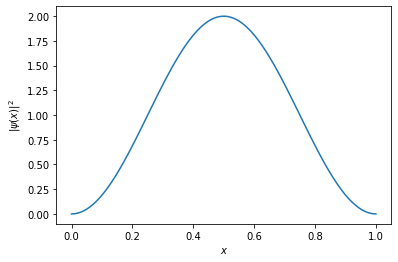

In [14]:
L = 1.0
x = np.linspace(0,L,100)
plt.ylabel(r"$\|\psi(x)|^2$")
plt.xlabel(r"$x$")
#for i in range(0,5):
plt.plot(x,psi_sq(x,1,L));

##  3.  Funciónes de onda normalizandas


Podemos utilizar Python tambien para verificar que la función está normalizada. El métdo *quad* de la 
librería scipy permite calcular integrales de forma numérica a través del método de cuadratura. Verifiquemos 
la normalización de la función de onda PEC en el estado n=2:

In [15]:
from scipy.integrate import quad

valor = quad(psi_sq, 0.0, 1.0, args = (4, L))
print(valor[0])

1.0000000000000002


In [16]:
n = 1
for i in range(0,50):
        valor = quad(psi_sq, 0.0, 1.0, args = (n, L))
        print(valor[1])
        print(n)
        n += 1


1.1102230246251565e-14
1
7.339841005112145e-10
2
1.1102230246251565e-14
3
7.339841234799138e-10
4
1.1102230246251565e-14
5
1.1091259475518728e-14
6
1.1102230246251565e-14
7
7.339841998077468e-10
8
1.1102230246251565e-14
9
1.1213252548714081e-14
10
1.1102230246251565e-14
11
1.1127800476863278e-14
12
1.1102230246251565e-14
13
1.1046719095020308e-14
14
1.1102230246251565e-14
15
7.3398403674374e-10
16
1.1102230246251565e-14
17
1.1157741397482823e-14
18
1.1102230246251565e-14
19
1.099120794378905e-14
20
1.1102230246251565e-14
21
1.1102230246251565e-14
22
1.1102230246251565e-14
23
1.0855044856419079e-14
24
1.1102230246251565e-14
25
1.1157741397482823e-14
26
1.1102230246251565e-14
27
1.099120794378905e-14
28
1.1102230246251565e-14
29
1.1157741397482823e-14
30
1.1102230246251565e-14
31
7.339837539838134e-10
32
1.1102230246251565e-14
33
1.0963452368173421e-14
34
1.1102230246251565e-14
35
1.1102230246251565e-14
36
1.1102230246251565e-14
37
1.099120794378905e-14
38
1.1102230246251565e-14
39
1.075

Este método integra sobre la primera variable de la función que en este caso es $x$ y devuelve el valor
de la integral y el error de la integración. En este caso es prácticamente uno por lo que pudimos verificar
que la función de onda esta normalizada. 

## 4. Superposición de estados de energía definida

Una partícula en un caja no necesariamente tiene que encontrarse en un estado de energía definida, sino puede 
estar en una superposición de distintos estados. Por ejemplo una particula con función de onda: 

$$
\psi(x) = c_1\sin{\frac{\pi x}{L}} + c_2\sin{\frac{2\pi x}{L}}
$$

Se encuentra simultaneamente en los estados de energía n = 2 y n =4, y los coeficientes $c_1$ y $c_2$ dan información
sobre la probabilidad de observación de la partícula en cada uno de esos dos estados, tal que:

$$
|c_1|^2+|c_2|^2 = 1
$$

La función de onda en superposición la podemos graficar usando las funciones definidas anteriormente. Vamos a graficar una función de onda en superposición de dos estados de energía n=2 y n=4. Que tienen la misma probabilidad de ser observados: Cómo cambia la densidad de probabilidad con respecto a los estados de energía puros?

In [17]:
def psi_sup(x,n1,n2,L):
    c1 = 1/np.sqrt(2)
    c2 = 1/np.sqrt(2)
    return c1*psi(x,n1,L)+c2*psi(x,n2,L)
def psi_sup_sq(x,n1,n2,L):
    return psi_sup(x,n1,n2,L)**2

Text(0.5, 0, '$x$')

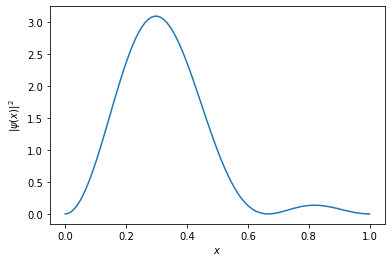

In [18]:
L = 1.0
x2 = np.linspace(0,L,100)
plt.plot(x2,psi_sup_sq(x2,1,2,L), label=r'$\psi_12(x)')
#plt.plot(x2,psi_sq(x2,4,L), label=r'$\psi_12(x)')
#plt.plot(x2,psi_sq(x2,2,L), label=r'$\psi_12(x)')
plt.ylabel(r"$\|\psi(x)|^2$")
plt.xlabel(r"$x$")
#plt.savefig("wf_sup.png")

## Particulas en cajas 2D y 3D

En la particula en una caja 2D, 
La función de onda para una partícula en una caja 2D de largo $l_x$ y $l_y$ se encuentra al solucionar la siguiente 
ecuación de Schrödinger:

$$ \hat{H}\psi(x,y) = E\psi(x,y) $$

el operador Hamiltoniano esta dado por:

$$\hat{H} = -\frac{\hbar^2}{2m}\Big(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} \Big)  $$

$|\psi(x,y)|^2$ entrga la densisdad de probabilidad en el punto (x,y). 

Esta ecuación se puede solucionar ya que la variable x e y son independientes una de la otra. La solución 
etnoces está dada por:

$$
\psi_{n_x,n_y}(x,y) = \sqrt{\frac{2}{l_x}}\sin{\frac{n_x\pi x}{l_x}}\sqrt{\frac{2}{l_y}}\sin{\frac{n_y\pi y}{l_y}} \qquad E_{n_x,n_y} = E_{n_x} + E_{n_y} =  \frac{n^2h}{8m}\Big ( \frac{n_x^2}{l_x^2} + \frac{n_y^2}{l_y^2}\Big ) 
$$

Para una particula en una caja 2D, el dominio donde se puede encontrar el electron es un plano y la funcion de onda
o densidad de probabilidad se puede visualizar como una superficie sobre ese plano, donde a cada punto en el plano 
se le asigna un valor. Grafiquemos la funcion de onda para una particula en una caja, en el estado $n_x=3$ y $n_y=4$.
Primero debemos definir la función:

In [41]:
Lx = 1.0
Ly = 1.0
nx = 2
ny = 3

def pec_2d(x,y,n_x,n_y,Lx,Ly):
    return psi(x,nx,Lx)*psi(y,ny,Ly)

def pec_2d_sq(x,y,n_x,n_y,Lx,Ly):
    return (psi(x,nx,Lx)*psi(y,ny,Ly))**2

Ahora debemos definir una grilla sobre la cual vamos a evaluar la función de onda:

In [42]:
x3 = np.linspace(0,Lx,100)
y3 = np.linspace(0,Ly,100)

X,Y = np.meshgrid(x3,y3)

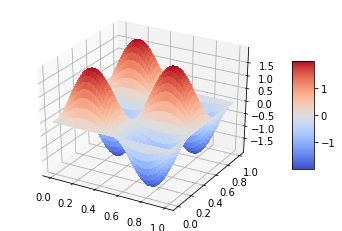

In [43]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, pec_2d(X,Y,nx,ny,Lx,Ly), cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5);

Se pueden apreciar bastante bien los nodos en la función de onda. También podemos graficar la densidad de proababilidad:

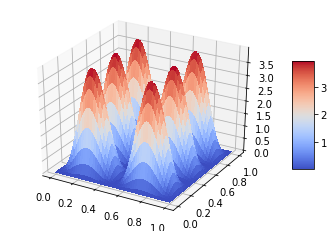

In [44]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, pec_2d_sq(X,Y,nx,ny,Lx,Ly), cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

Otra manera de visualizar ls funcion de onda de la PEC 2D es utilizando lineas de isocontorno. Estas son una proyección de la función de onda sobre el plano de coordenadas.  Cada curva  corresponde
a regiones en en plano xy donde la función de onda tiene el mismo valor.

<a list of 43 text.Text objects>

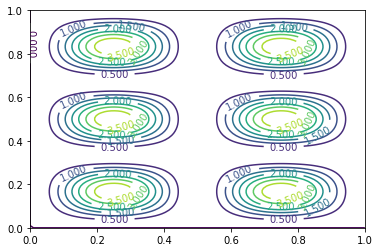

In [45]:
plt.figure()
CS = plt.contour(X, Y, pec_2d_sq(X,Y,nx,ny,Lx,Ly))
plt.clabel(CS, inline=1, fontsize=10)

### PEC 3-D

Finalmente vamos a intentar visualizar una particula en una caja 3D. La PEC-3D se obtiene de forma similar a la PEC 2-D. Las soluciones son:

$$
\psi_{n_x,n_y,n_z}(x,y,z) = \sqrt{\frac{2}{l_x}}\sin{\frac{n_x\pi x}{l_x}}\sqrt{\frac{2}{l_y}}\sin{\frac{n_y\pi y}{l_y}}\sqrt{\frac{2}{l_z}}\sin{\frac{n_z\pi z}{l_z}} \qquad E_{n_x,n_y,n_z} = E_{n_x} + E_{n_y} + E_{n_z} =  \frac{h^2}{8m}\Big ( \frac{n_x^2}{l_x^2} + \frac{n_y^2}{l_y^2}+ \frac{n_z^2}{l_z^2}\Big ) 
$$


El problema con una PEC 3D es que 
el dominio de la particula es el espacio 3D y por lo tanto no existen dimensiones suficientes para visualizar 
la función de onda completa. Es por eso que solamente se puede visualizar proyecciones. Entonces vamos hacer lo mismo que hicimos 
con la PEC 2D pero al tratarse de un problema 3D las lineas de contorno se convierten en isosuperficies en el espacio, tal que cada punto sobre
la superficie tiene el mismo valor de densidad de probabilidad.

In [56]:
Lx = 1.0
Ly = 1.0
Lz = 1.0
nx = 1
ny = 2
nz = 3


def pec_3d(x,y,z,nx,ny,nz,Lx,Ly,Lz):
    return psi(x,nx,Lx)*psi(y,ny,Ly)*psi(z,nz,Lz)


def pec_3d_sq(x,y,z,nx,ny,nz,Lx,Ly,Lz):
    return (psi(x,nx,Lx)*psi(y,ny,Ly)*psi(z,nz,Lz))**2

In [58]:
iso_valor = 3.5 # El valor de densidad para la isosuperficie 



#plotly.offline.init_notebook_mode(connected=True)

# Definición de la grilla 3D
x4 = np.linspace(0,Lx,100)
y4 = np.linspace(0,Ly,100)
z4 =  np.linspace(0,Lz,100)
X,Y,Z = np.meshgrid(x4,y4,z4)


vertices, simplices = measure.marching_cubes_classic(pec_3d_sq(X,Y,Z,nx,ny,nz,Lx,Ly,Lz), iso_valor)
x,y,z = zip(*vertices)  

configure_plotly_browser_state()
fig = ff.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        #colormap='flag',
                        simplices=simplices,
                        title="Isosurface")

#plotly.offline.iplot(fig)
#fig.show(renderer='svg')
fig